# Pymaceuticals Inc.

## Analysis
- There were 10 different drugs analyzed in the study. Ramicane was the drug with the best results, it avergaed a Tumor Volume of 40.21 followed up by Capomulin which averaged 40.67. These two drugs were much better than the other 8.
- The gender of the mice was almost equal, haivng 49% of females and 51% of males.
- There were mice that did not reach the 45 days, but the mayority did.
- We could say that the data was accurate as there was just one outlier value in the 4 drugs examined by boxplots.
- We took mouse "I509" for a closer observation with the Capomulin treatment. Here we observed that at the first 20 days with the drug, the Tumor grew 3 mm, but right after that, it started to decrease significantly until day 35 where it started to grow again a little.
- We saw with a scatter plot, that there is a correlation between the weight of mice and the size of the tumors. The heavier the mice, the bigger the tumor. This correlation was of 0.84, so it is pretty close to a perfect correlation of 1.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# number of mice
mice_count = data_complete['Mouse ID'].unique()
mice_count = len(mice_count)
mice_count

249

In [3]:
# Getting the duplicate mice
duplicate_mouse_ids = data_complete.loc[data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_data = data_complete.loc[data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# data_cleaned
clean_data = data_complete[data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Counting the # of Mouse ID
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
from scipy.stats import sem

In [7]:
# calculating the desired variables
mean_tumor = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_tumor = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var_tumor = clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_tumor = clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']

sem_tumor = clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


In [8]:
# creating a DataFrame with the previous calculated variables
summary_data = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor,
    'Median Tumor Volume': median_tumor,
    'Tumor Volume Variance': var_tumor,
    'Tumor Volume Std. Dev.': std_tumor,
    "Tumor Volume Std. Errr.": sem_tumor
})
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Errr.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Creating the same Data Frame, but using the aggregate method
clean_data.groupby('Drug Regimen').agg(

    mean = ('Tumor Volume (mm3)','mean'),
    median = ('Tumor Volume (mm3)','median'),
    var = ('Tumor Volume (mm3)','var'),
    std = ('Tumor Volume (mm3)', 'std'),
    sem = ('Tumor Volume (mm3)', 'sem'),
)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

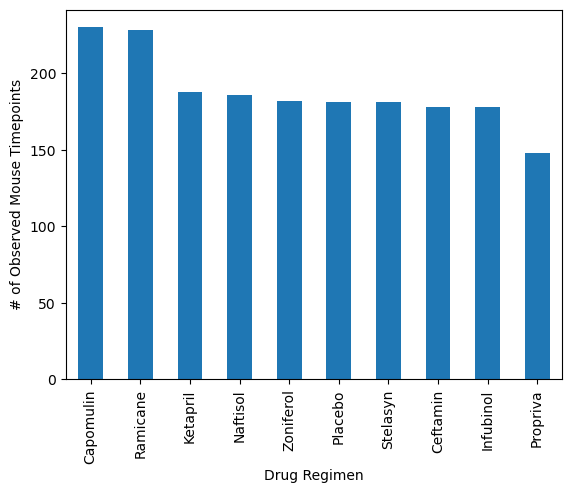

In [10]:
# Creating a BarPlot using pandas
count_rows = clean_data.groupby(['Drug Regimen'])['Mouse ID'].count()
count_rows.sort_values(ascending=False).plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')
plt.show()

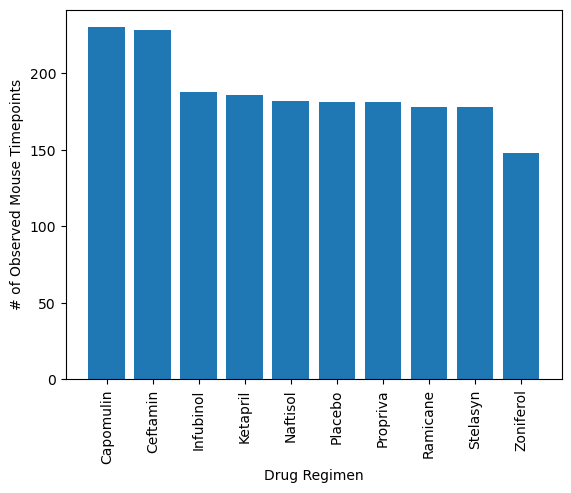

In [11]:
# Creating a bar plot using pyplot
labels = count_rows.index
y_values = count_rows.sort_values(ascending=False)
plt.bar(labels,y_values)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

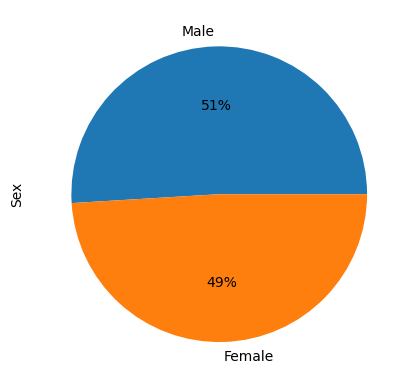

In [12]:
# Creating a pie chart using pandas
count_gender = clean_data.groupby(['Sex'])['Sex'].count()
count_gender.sort_values(ascending=False).plot.pie(y='Sex',autopct='%1.0f%%')
plt.show()

In [13]:
count_gender.index

Index(['Female', 'Male'], dtype='object', name='Sex')

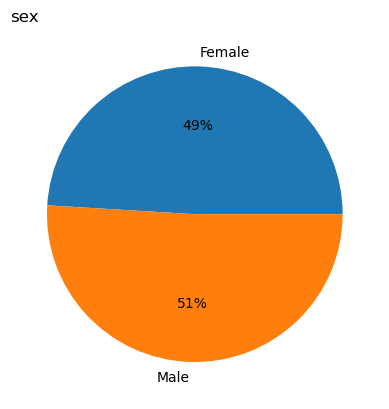

In [14]:
# Creating a pie chart using pyplot
plt.pie(count_gender.values,autopct='%1.0f%%', labels=count_gender.index.values)
plt.title('sex',loc="left")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# merging Data Frames grouped by Mouse ID To have the tumor Volume for each max Timepoint
greatest_timepoint = clean_data.groupby(['Mouse ID']).max()['Timepoint']
new_data = pd.merge(data_complete, greatest_timepoint, how="right", on=["Mouse ID", "Timepoint"])
new_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
#Calculating the Outliers for each desired Treatment
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_data = []

for drug in treatments:
    subsetted_tumor_vol = new_data.loc[new_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_data.append(subsetted_tumor_vol)
    quartiles = subsetted_tumor_vol.quantile([.25,.5,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    outliers = subsetted_tumor_vol.loc[(subsetted_tumor_vol < lower_bound) | (subsetted_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


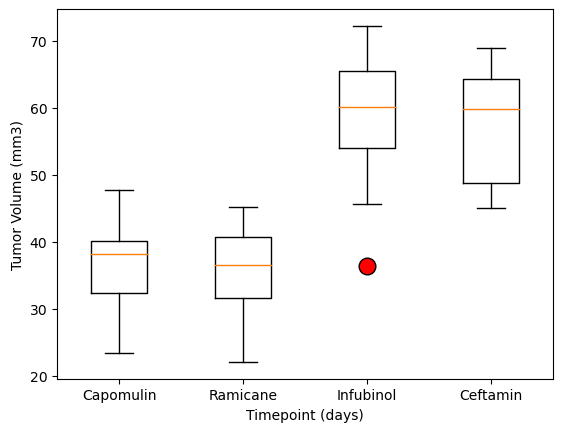

In [17]:
# Generating boxplots that show the 4 treatments desired
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_data, labels = treatments,flierprops=orange_out)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

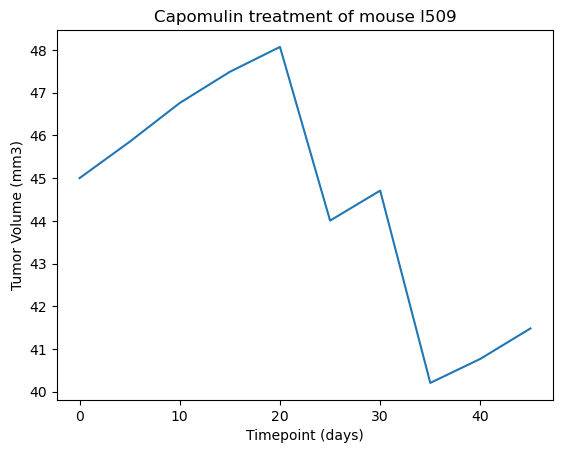

In [18]:
# Creating a Line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

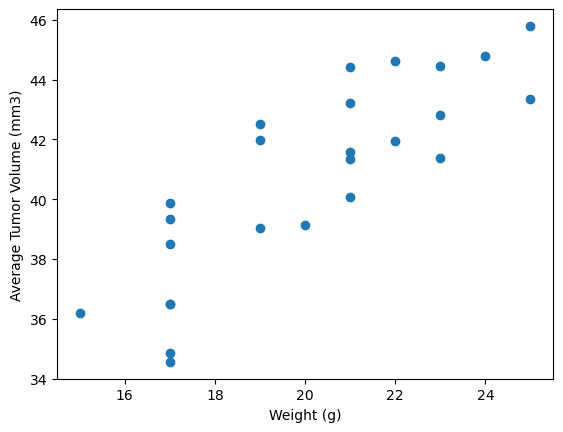

In [19]:
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).aggregate({'Weight (g)': 'mean','Tumor Volume (mm3)': 'mean'})
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [20]:
from scipy.stats import linregress

In [21]:
# assigning our x and y axis values, and calculating the variables needed
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

The correlation between mouse weight and the average tumor volume is 0.84


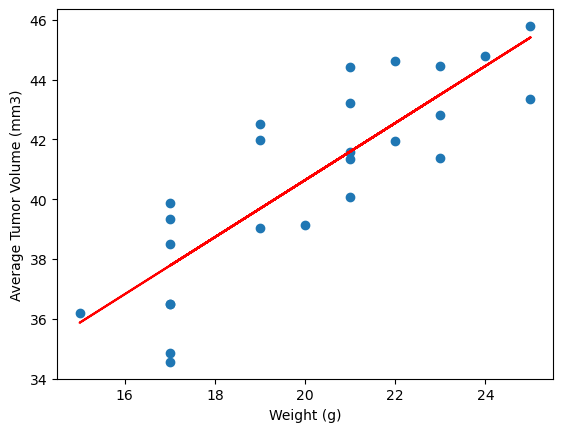

In [22]:
# Calculating the correlation between the mouse wwight and the average tumor, plot the linear regression with the scatter plot
correlation = capomulin_average.corr()['Weight (g)']
correlation = correlation.iloc[1]
print(f'''The correlation between mouse weight and the average tumor volume is {round(correlation,2)}''')
y_predict = intercept + (slope*x_values)
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()